In [1]:
#import libraries
import os
import pandas as pd
import numpy as np
#from fancyimpute import KNN
import matplotlib.pyplot as plt
import statsmodels.api as sm
#import KNN
import seaborn as sns
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

D:\Python_Setup\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
D:\Python_Setup\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#set working directory
os.chdir("D:\Edwisor#2\Project#1_Python")
os.getcwd()

'D:\\Edwisor#2\\Project#1_Python'

In [3]:
#Import Excel file
df = pd.read_excel("Absenteeism.xls")
#check the class of the df
type(df)
#check the number of the variable and observation
df.shape


(740, 21)

In [4]:
#Rename the variable
df = df.rename(columns={'Reason for absence': 'Reason_for_absence', 'Month of absence': 'Month_of_absence',
                       'Day of the week': 'Day_of_the_week' ,'Transportation expense':'Transportation_expense',
                       'Distance from Residence to Work': 'Distance_from_Residence_to_Work',
                       'Service time':'Service_time','Work load Average/day ':'Work_load_Average_per_day',
                       'Hit target':'Hit_target','Disciplinary failure':'Disciplinary_failure',
                       'Social drinker':'Social_drinker','Social smoker':'Social_smoker',
                       'Body mass index':'Body_mass_index','Absenteeism time in hours':'Absenteeism_time_in_hours'})

In [5]:
#convert the variable into proper datatype
df['Reason_for_absence']     = df['Reason_for_absence'].astype(object)
df['Age']                  = df['Age'].astype(object)
df['Son']                  = df['Son'].astype(object)
df['Month_of_absence']     = df['Month_of_absence'].astype(object)
df['Day_of_the_week']      = df['Day_of_the_week'].astype(object)
df['Seasons']              = df['Seasons'].astype(object)
df['Disciplinary_failure'] = df['Disciplinary_failure'].astype(object)
df['Education']            = df['Education'].astype(object)
df['Social_drinker']       = df['Social_drinker'].astype(object)
df['Social_smoker']        = df['Social_smoker'].astype(object)
df['Pet']                  = df['Pet'].astype(object)



In [6]:
#find out the number missing value
missing_val = pd.DataFrame(df.isnull().sum())
print(missing_val)

                                  0
ID                                0
Reason_for_absence                3
Month_of_absence                  1
Day_of_the_week                   0
Seasons                           0
Transportation_expense            7
Distance_from_Residence_to_Work   3
Service_time                      3
Age                               3
Work_load_Average_per_day        10
Hit_target                        6
Disciplinary_failure              6
Education                        10
Son                               6
Social_drinker                    3
Social_smoker                     4
Pet                               2
Weight                            1
Height                           14
Body_mass_index                  31
Absenteeism_time_in_hours        22


In [7]:
#Impute the missing value
# for numerical values impute with mean
#for categorical values impute with mode
def Impute_missing(data):
    for i in range(0, len(data.columns)):
        if(df.iloc[:,i].dtypes == 'float64'):
            df.iloc[:,i] = df.iloc[:,i].fillna(df.iloc[:,i].mean())
        elif (df.iloc[:,i].dtypes == 'int64'):
            df.iloc[:,i] = df.iloc[:,i].fillna(df.iloc[:,i].mean())
        else:
            df.iloc[:,i] = df.iloc[:,i].fillna(df.iloc[:,i].mode()[0])
    return data
                
            

In [8]:
#call the function and impute the missing value
Impute_missing(df)

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average_per_day,...,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
0,11,26.0,7.0,3,1,289.000000,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.000000,4.000000
1,36,0.0,7.0,3,1,118.000000,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.000000,0.000000
2,3,23.0,7.0,4,1,179.000000,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.000000,2.000000
3,7,7.0,7.0,5,1,279.000000,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.000000,4.000000
4,11,23.0,7.0,5,1,289.000000,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.000000,2.000000
5,3,23.0,7.0,6,1,179.000000,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.000000,6.977716
6,10,22.0,7.0,6,1,221.035471,52.0,3.0,28.0,239554.0,...,0.0,1.0,1.0,1.0,0.0,4.0,80.0,172.0,27.000000,8.000000
7,20,23.0,7.0,6,1,260.000000,50.0,11.0,36.0,239554.0,...,0.0,1.0,4.0,1.0,0.0,0.0,65.0,168.0,23.000000,4.000000
8,14,19.0,7.0,2,1,155.000000,12.0,14.0,34.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,0.0,95.0,196.0,25.000000,40.000000
9,1,22.0,7.0,2,1,235.000000,11.0,14.0,37.0,239554.0,...,0.0,3.0,1.0,0.0,0.0,1.0,88.0,172.0,29.000000,8.000000


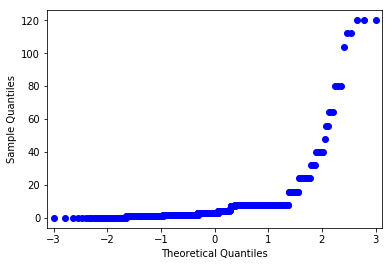

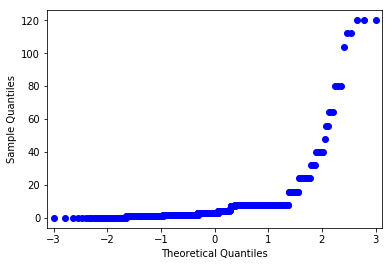

In [9]:
sm.qqplot(df['Absenteeism_time_in_hours'])
#now we have seen that the dependent variable negatively skewed.

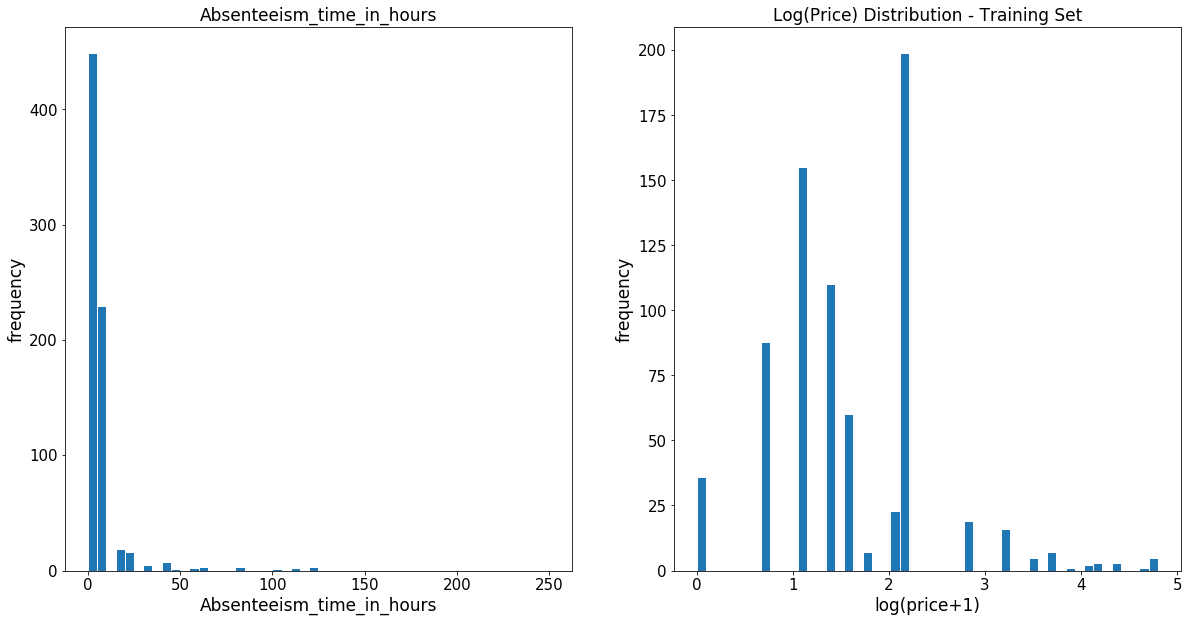

In [10]:
#plot the histogram for the dependent variable
#First graph will shows that the dependent variable is not at all normally distributed
#In Second graph will take the log of dependent variable to make the data normally distributed
plt.subplot(1,2,1)
(df['Absenteeism_time_in_hours']).plot.hist(bins=50, figsize=(20,10), edgecolor='white',range=[0,250])
plt.xlabel('Absenteeism_time_in_hours', fontsize=17)
plt.ylabel('frequency', fontsize=17)
plt.tick_params(labelsize=15)
plt.title('Absenteeism_time_in_hours', fontsize=17)

plt.subplot(1, 2, 2)
np.log(df['Absenteeism_time_in_hours']+1).plot.hist(bins=50, figsize=(20,10), edgecolor='white')
plt.xlabel('log(price+1)', fontsize=17)
plt.ylabel('frequency', fontsize=17)
plt.tick_params(labelsize=15)
plt.title('Log(Price) Distribution - Training Set', fontsize=17)
plt.show()

In [11]:
#Change the dependent variable into log value so that it distribute normally
df['Absenteeism_time_in_hours'] = np.log(df['Absenteeism_time_in_hours']+1)

In [12]:
#create Dummy variable
df['son_NO'] = np.where(df['Son']== 0, 1, 0).astype(object)
df['son_YES'] = np.where(df['Son']> 0, 1, 0).astype(object)

df['Age_less_40'] = np.where(df['Age'] < 40, 1, 0).astype(object)
df['Age_more_40'] = np.where(df['Age'] >= 40, 1, 0).astype(object)

df['ICD_Disease'] = np.where(df['Reason_for_absence'] <= 21, 1, 0).astype(object)
df['CID_Disease'] = np.where(df['Reason_for_absence'] > 21, 1, 0).astype(object)
#df.drop(columns=['son1', 'Son2'])

In [13]:
#Create a list of categorical variable
Cate_variable = ['Month_of_absence','Day_of_the_week','Seasons','Disciplinary_failure',
                'Education','Social_drinker','Social_smoker','Pet']


In [14]:
#Create Dummy variable for categorical value
def Create_Dummy(data,Cate_variable):
    for i in Cate_variable:
        dummy = pd.get_dummies(data[i],prefix = i , dummy_na = False)
        data = data.drop(i,1)
        data = pd.concat([data,dummy],axis = 1)
    return data

In [15]:
#Create the final dataset with all the dummy variable in it
df = Create_Dummy(df,Cate_variable)

In [16]:
#convert all the dummy variable into categorical variable
for i in range(0, len(df.columns)):
    if(df.iloc[:,i].dtypes == 'uint8'):
        df.iloc[:,i] = df.iloc[:,i].astype(object)

In [17]:
#create the list of the variable which need to be deleted
del_var = ['Son','Age','Reason_for_absence']


In [18]:
#Delete the variables
for i in del_var:
    df = df.drop(i,1)

{'boxes': [<matplotlib.lines.Line2D at 0xc3b3400>],
 'caps': [<matplotlib.lines.Line2D at 0xc3b3e10>,
 'fliers': [<matplotlib.lines.Line2D at 0xc3baac8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xc3ba6a0>],
 'whiskers': [<matplotlib.lines.Line2D at 0xc3b3550>,
  <matplotlib.lines.Line2D at 0xc3b39e8>]}

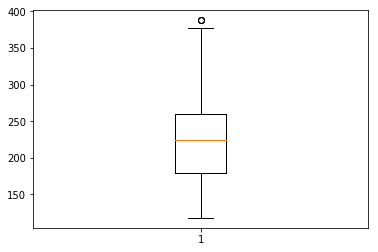

In [19]:
plt.boxplot(df['Transportation_expense'])
#outlier present

{'boxes': [<matplotlib.lines.Line2D at 0xc40f668>],
 'caps': [<matplotlib.lines.Line2D at 0xc41a0b8>,
 'fliers': [<matplotlib.lines.Line2D at 0xc41ad30>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xc41a908>],
 'whiskers': [<matplotlib.lines.Line2D at 0xc40f7b8>,
  <matplotlib.lines.Line2D at 0xc40fc50>]}

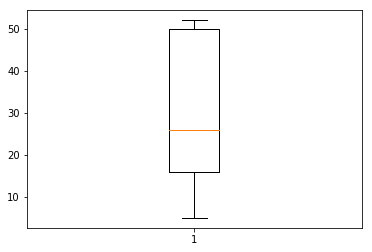

In [20]:
plt.boxplot(df['Distance_from_Residence_to_Work'])
#outlier not present

{'boxes': [<matplotlib.lines.Line2D at 0xc46e470>],
 'caps': [<matplotlib.lines.Line2D at 0xc46ee80>,
 'fliers': [<matplotlib.lines.Line2D at 0xc876b38>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xc876710>],
 'whiskers': [<matplotlib.lines.Line2D at 0xc46e5c0>,
  <matplotlib.lines.Line2D at 0xc46ea58>]}

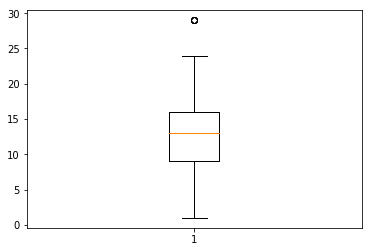

In [21]:
plt.boxplot(df['Service_time'])
#outlier present

{'boxes': [<matplotlib.lines.Line2D at 0xc8cccf8>],
 'caps': [<matplotlib.lines.Line2D at 0xc8d5748>,
 'fliers': [<matplotlib.lines.Line2D at 0xc8de400>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xc8d5f98>],
 'whiskers': [<matplotlib.lines.Line2D at 0xc8cce48>,
  <matplotlib.lines.Line2D at 0xc8d5320>]}

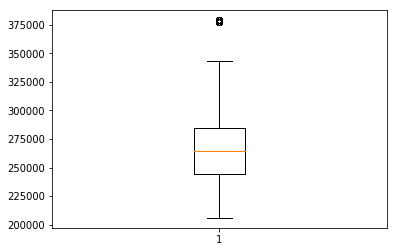

In [22]:
plt.boxplot(df['Work_load_Average_per_day'])
#outlier present

{'boxes': [<matplotlib.lines.Line2D at 0xc932a58>],
 'caps': [<matplotlib.lines.Line2D at 0xc93a4a8>,
 'fliers': [<matplotlib.lines.Line2D at 0xc943160>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xc93acf8>],
 'whiskers': [<matplotlib.lines.Line2D at 0xc932ba8>,
  <matplotlib.lines.Line2D at 0xc93a080>]}

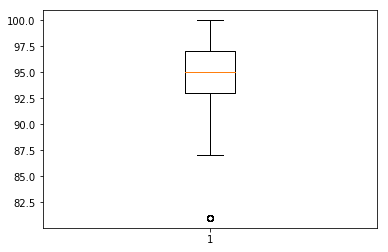

In [23]:
plt.boxplot(df['Hit_target'])
#outlier present

{'boxes': [<matplotlib.lines.Line2D at 0xc99c828>],
 'caps': [<matplotlib.lines.Line2D at 0xc9a3278>,
 'fliers': [<matplotlib.lines.Line2D at 0xc9a3ef0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xc9a3ac8>],
 'whiskers': [<matplotlib.lines.Line2D at 0xc99c978>,
  <matplotlib.lines.Line2D at 0xc99ce10>]}

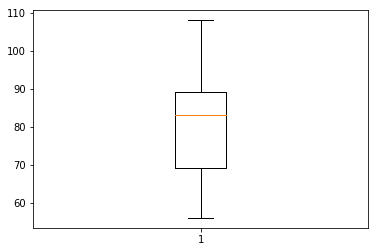

In [24]:
plt.boxplot(df['Weight'])
#outlier not present

{'boxes': [<matplotlib.lines.Line2D at 0xcc06ba8>],
 'caps': [<matplotlib.lines.Line2D at 0xcc105f8>,
 'fliers': [<matplotlib.lines.Line2D at 0xcc182b0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xcc10e48>],
 'whiskers': [<matplotlib.lines.Line2D at 0xcc06cf8>,
  <matplotlib.lines.Line2D at 0xcc101d0>]}

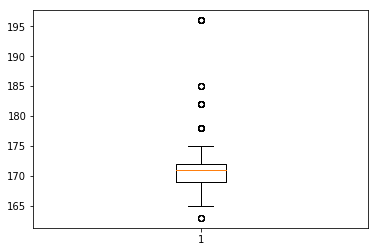

In [25]:
plt.boxplot(df['Height'])
#outlier present

{'boxes': [<matplotlib.lines.Line2D at 0xcc70390>],
 'caps': [<matplotlib.lines.Line2D at 0xcc70da0>,
 'fliers': [<matplotlib.lines.Line2D at 0xcc79a58>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xcc79630>],
 'whiskers': [<matplotlib.lines.Line2D at 0xcc704e0>,
  <matplotlib.lines.Line2D at 0xcc70978>]}

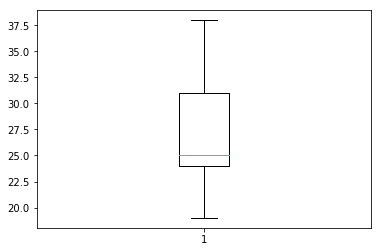

In [26]:
plt.boxplot(df['Body_mass_index'])
#outlier not present

In [27]:
#From above boxplot of the continous variable we have seen that there are outlier present in few of the numerical variables
#now we will remove the outliers from numerical variables
#Create a list of numerical variables

num_val = ['ID','Transportation_expense','Distance_from_Residence_to_Work','Service_time',
          'Work_load_Average_per_day','Hit_target','Weight','Height','Body_mass_index','Absenteeism_time_in_hours']

In [28]:
#Detect and replace the outlier with NA
for i in num_val:
    q75,q25 = np.nanpercentile(df.loc[:,i],[75,25])

    iqr = q75-q25
    
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)
    
    df.loc[df.loc[:,i] < minimum,i] = np.nan
    df.loc[df.loc[:,i] > maximum,i] = np.nan
    
    print(i,' Missing value ---------- :- ',df.loc[:,i].isnull().sum())


ID  Missing value ---------- :-  0
Transportation_expense  Missing value ---------- :-  3
Distance_from_Residence_to_Work  Missing value ---------- :-  0
Service_time  Missing value ---------- :-  5
Work_load_Average_per_day  Missing value ---------- :-  31
Hit_target  Missing value ---------- :-  19
Weight  Missing value ---------- :-  0
Height  Missing value ---------- :-  119
Body_mass_index  Missing value ---------- :-  0
Absenteeism_time_in_hours  Missing value ---------- :-  15


In [29]:
#call the function impute_missing to impute the missing value
Impute_missing(df)

,ID,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Work_load_Average_per_day,Hit_target,Weight,Height,Body_mass_index,Absenteeism_time_in_hours,...,Social_drinker_0.0,Social_drinker_1.0,Social_smoker_0.0,Social_smoker_1.0,Pet_0.0,Pet_1.0,Pet_2.0,Pet_4.0,Pet_5.0,Pet_8.0
0,11.0,289.000000,36.0,13.0,239554.0,97.0,90.0,172.000000,30.000000,1.609438,...,0,1,1,0,0,1,0,0,0,0
1,36.0,118.000000,13.0,18.0,239554.0,97.0,98.0,170.129051,31.000000,0.000000,...,0,1,1,0,1,0,0,0,0,0
2,3.0,179.000000,51.0,18.0,239554.0,97.0,89.0,170.000000,31.000000,1.098612,...,0,1,1,0,1,0,0,0,0,0
3,7.0,279.000000,5.0,14.0,239554.0,97.0,68.0,168.000000,24.000000,1.609438,...,0,1,0,1,1,0,0,0,0,0
4,11.0,289.000000,36.0,13.0,239554.0,97.0,90.0,172.000000,30.000000,1.098612,...,0,1,1,0,0,1,0,0,0,0
5,3.0,179.000000,51.0,18.0,239554.0,97.0,89.0,170.000000,31.000000,2.076652,...,0,1,1,0,1,0,0,0,0,0
6,10.0,221.035471,52.0,3.0,239554.0,97.0,80.0,172.000000,27.000000,2.197225,...,0,1,1,0,0,0,0,1,0,0
7,20.0,260.000000,50.0,11.0,239554.0,97.0,65.0,168.000000,23.000000,1.609438,...,0,1,1,0,1,0,0,0,0,0
8,14.0,155.000000,12.0,14.0,239554.0,97.0,95.0,170.129051,25.000000,3.713572,...,0,1,1,0,1,0,0,0,0,0
9,1.0,235.000000,11.0,14.0,239554.0,97.0,88.0,172.000000,29.000000,2.197225,...,1,0,1,0,0,1,0,0,0,0


In [30]:
#find out the number missing value
missing_val = pd.DataFrame(df.isnull().sum())
print(missing_val)

                                 0
ID                               0
Transportation_expense           0
Distance_from_Residence_to_Work  0
Service_time                     0
Work_load_Average_per_day        0
Hit_target                       0
Weight                           0
Height                           0
Body_mass_index                  0
Absenteeism_time_in_hours        0
son_NO                           0
son_YES                          0
Age_less_40                      0
Age_more_40                      0
ICD_Disease                      0
CID_Disease                      0
Month_of_absence_0.0             0
Month_of_absence_1.0             0
Month_of_absence_2.0             0
Month_of_absence_3.0             0
Month_of_absence_4.0             0
Month_of_absence_5.0             0
Month_of_absence_6.0             0
Month_of_absence_7.0             0
Month_of_absence_8.0             0
Month_of_absence_9.0             0
Month_of_absence_10.0            0
Month_of_absence_11.

In [31]:
#Create a dataset with all the numerical variable in it
df_corr = df.loc[:,num_val]


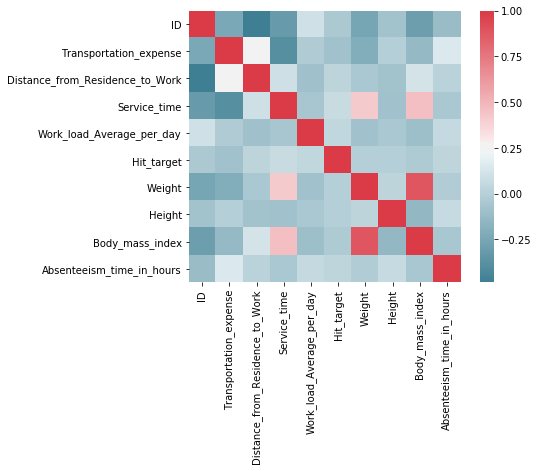

In [32]:
#set the width and height of the plot
wd , ht = plt.subplots(figsize=(7,5))

#Generate correlation matrix
corr = df_corr.corr()

#plot heat map seaborn library
sns.heatmap(corr,mask = np.zeros_like(corr,dtype = np.bool),cmap=sns.diverging_palette(220,10,as_cmap = True),
            square = True,ax= ht)

In [33]:
#Now from the above correlation plot we can drop one of those variable which are highly corelated
df = df.drop('Body_mass_index',1)

In [34]:
#Create a new dataframe of dependent variable
dep_var = pd.DataFrame(df['Absenteeism_time_in_hours'])

In [35]:
#Take out the dependent variable from the dataset
df = df.drop('Absenteeism_time_in_hours',1)

(array([ 92.,   0.,  36., 185.,   8.,  10., 155.,  54.,  43.,  90.,   5.,
          0.,  16.,   0.,  46.]),
 array([118.        , 135.33333333, 152.66666667, 170.        ,
        187.33333333, 204.66666667, 222.        , 239.33333333,
        256.66666667, 274.        , 291.33333333, 308.66666667,
        326.        , 343.33333333, 360.66666667, 378.        ]),
 <a list of 15 Patch objects>)

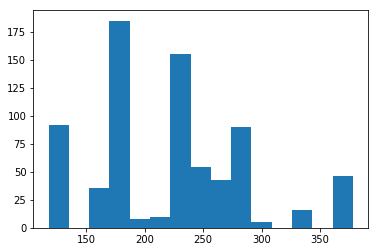

In [36]:
#plot the histogram of the few variable to see the data is normally distributed or not.
%matplotlib inline
plt.hist(df['Transportation_expense'], bins='auto')

(array([ 92.,   0.,  36., 185.,   8.,  10., 155.,  54.,  43.,  90.,   5.,
          0.,  16.,   0.,  46.]),
 array([118.        , 135.33333333, 152.66666667, 170.        ,
        187.33333333, 204.66666667, 222.        , 239.33333333,
        256.66666667, 274.        , 291.33333333, 308.66666667,
        326.        , 343.33333333, 360.66666667, 378.        ]),
 <a list of 15 Patch objects>)

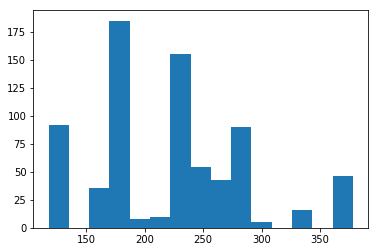

In [37]:
plt.hist(df['Transportation_expense'], bins='auto')

(array([  6., 143.,  59.,  39., 180.,  24.,  37.,  42.,   7.,   1., 202.]),
 array([ 5.        ,  9.27272727, 13.54545455, 17.81818182, 22.09090909,
        26.36363636, 30.63636364, 34.90909091, 39.18181818, 43.45454545,
        47.72727273, 52.        ]),
 <a list of 11 Patch objects>)

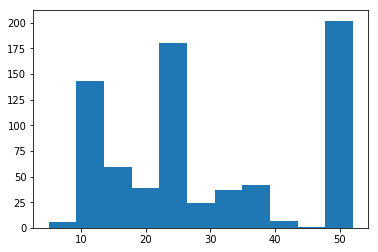

In [38]:
plt.hist(df['Distance_from_Residence_to_Work'], bins='auto')

In [39]:
#now we have seen the data is not normally distributed,it is a skewed data
#now we will normalize the data by performing the normalization technique in continuous variables
num_val2 = ['ID','Transportation_expense','Distance_from_Residence_to_Work','Service_time',
          'Work_load_Average_per_day','Hit_target','Weight','Height']

In [40]:
#Scale the numerical variables as the some of the variable are too high in same some are too low
#so make our prediction not to baised toward high scale variable will perform scaling
for i in num_val2:
    df[i] = (df[i] - min(df[i]))/(max(df[i]) - min(df[i]))

In [41]:
#Merge the dependent variable andindependent variable to make final dataset
final_df = pd.concat([dep_var,df],axis=1)

print(final_df.shape)

(740, 53)


In [42]:
#Split the data into test and train data using sklearn library
train,test = train_test_split(final_df,test_size = 0.3)

In [43]:
#Build the linear regression model
lm_model = sm.OLS(train.iloc[:,0],train.iloc[:,1:53]).fit()

In [44]:
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Absenteeism_time_in_hours   R-squared:                       0.443
Model:                                   OLS   Adj. R-squared:                  0.395
Method:                        Least Squares   F-statistic:                     9.236
Date:                       Thu, 21 Jun 2018   Prob (F-statistic):           4.16e-39
Time:                               21:38:52   Log-Likelihood:                -428.31
No. Observations:                        518   AIC:                             940.6
Df Residuals:                            476   BIC:                             1119.
Df Model:                                 41                                         
Covariance Type:                   nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
ID                                 -0.3816      0.152     -2.516      0.012      -0.680      -0.084
Transportation_expense              0.3324      0.201      1.655      0.099      -0.062       0.727
Distance_from_Residence_to_Work    -0.2113      0.157     -1.342      0.180      -0.521       0.098
Service_time                       -0.6310      0.304     -2.078      0.038      -1.228      -0.034
Work_load_Average_per_day           0.0595      0.143      0.417      0.677      -0.221       0.340
Hit_target                          0.0151      0.153      0.098      0.922      -0.286       0.317
Weight                              0.0432      0.178      0.242      0.809      -0.307       0.394
Height                              0.3438      0.225      1.530      0.127      -0.098       0.785
son_NO                              0.0451      0.079      0.569      0.570      -0.111       0.201
son_YES                             0.2081      0.057      3.667      0.000       0.097       0.320
Age_less_40                         0.1297      0.075      1.732      0.084      -0.017       0.277
Age_more_40                         0.1235      0.067      1.839      0.066      -0.008       0.255
ICD_Disease                         0.4037      0.057      7.034      0.000       0.291       0.516
CID_Disease                        -0.1504      0.057     -2.619      0.009      -0.263      -0.038
Month_of_absence_0.0               -1.7221      0.336     -5.126      0.000      -2.382      -1.062
Month_of_absence_1.0               -0.1680      0.165     -1.016      0.310      -0.493       0.157
Month_of_absence_2.0                0.1296      0.149      0.868      0.386      -0.164       0.423
Month_of_absence_3.0                0.2056      0.121      1.692      0.091      -0.033       0.444
Month_of_absence_4.0                0.1451      0.151      0.961      0.337      -0.152       0.442
Month_of_absence_5.0               -0.1423      0.145     -0.980      0.328      -0.428       0.143
Month_of_absence_6.0                0.1131      0.129      0.873      0.383      -0.141       0.367
Month_of_absence_7.0                0.3939      0.152      2.597      0.010       0.096       0.692
Month_of_absence_8.0                0.2282      0.163      1.401      0.162      -0.092       0.548
Month_of_absence_9.0                0.3065      0.139      2.199      0.028       0.033       0.580
Month_of_absence_10.0               0.2741      0.160      1.717      0.087      -0.040       0.588
Month_of_absence_11.0               0.2342      0.157      1.491      0.137      -0.074       0.543
Month_of_absence_12.0               0.2555      0.139      1.835      0.067      -0.018       0.529
Day_of

In [45]:
#Make the predictions
lm_prediction = lm_model.predict(test.iloc[:,1:53])

In [46]:
#create function for calculating the MAPE
def MAPE(y_true, y_pred): 
    mask = y_true != 0
    return ((np.fabs(y_true - y_pred)/y_true)[mask].mean())*100

In [47]:
MAPE(test.iloc[:,0],lm_prediction)

32.564388761458346

In [48]:
#sqrt(mean_squared_error(test.iloc[:,0], lm_prediction))
mean_squared_error(test.iloc[:,0], lm_prediction)

0.3837275610358071

In [49]:
#Now we will select only the significant variables and create the model and check the error rate
train_improve = train[['ID','ICD_Disease',
                 'Month_of_absence_0.0','Month_of_absence_6.0','Month_of_absence_7.0',
                 'Transportation_expense','Distance_from_Residence_to_Work',
                 'Disciplinary_failure_0.0','Disciplinary_failure_1.0']]

In [50]:
#Test data
test_improve = test[['ID','ICD_Disease',
                 'Month_of_absence_0.0','Month_of_absence_6.0','Month_of_absence_7.0',
                 'Transportation_expense','Distance_from_Residence_to_Work',
                 'Disciplinary_failure_0.0','Disciplinary_failure_1.0']]


In [51]:
#Build the linear regression model again with significant variable
lm_model_improve = sm.OLS(train.iloc[:,0],train_improve).fit()

In [52]:
lm_model_improve.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Absenteeism_time_in_hours   R-squared:                       0.382
Model:                                   OLS   Adj. R-squared:                  0.373
Method:                        Least Squares   F-statistic:                     39.38
Date:                       Thu, 21 Jun 2018   Prob (F-statistic):           9.09e-49
Time:                               21:38:52   Log-Likelihood:                -455.13
No. Observations:                        518   AIC:                             928.3
Df Residuals:                            509   BIC:                             966.5
Df Model:                                  8                                         
Covariance Type:                   nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
ID                                 -0.2262      0.094     -2.404      0.017      -0.411      -0.041
ICD_Disease                         0.6009      0.056     10.787      0.000       0.491       0.710
Month_of_absence_0.0               -1.9037      0.343     -5.549      0.000      -2.578      -1.230
Month_of_absence_6.0                0.0736      0.108      0.681      0.496      -0.139       0.286
Month_of_absence_7.0                0.1860      0.084      2.212      0.027       0.021       0.351
Transportation_expense              0.4947      0.108      4.593      0.000       0.283       0.706
Distance_from_Residence_to_Work    -0.1259      0.095     -1.325      0.186      -0.313       0.061
Disciplinary_failure_0.0            1.3578      0.097     13.934      0.000       1.166       1.549
Disciplinary_failure_1.0           -0.3396      0.155     -2.189      0.029      -0.644      -0.035
==============================================================================
Omnibus:                       24.031   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.916
Skew:                           0.437   Prob(JB):                     3.19e-07
Kurtosis:                       3.789   Cond. No.                         17.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
#Make the improve predictions
lm_prediction_improve = lm_model_improve.predict(test_improve)

In [54]:
#calulate MAPE
MAPE(test.iloc[:,0],lm_prediction_improve)

31.861873653289823

In [55]:
#Calculate Mean sqaure error
mean_squared_error(test.iloc[:,0], lm_prediction_improve)

0.35245111952580216

In [56]:
#Now we have seen that MAPE and MSE is reduced with significant variables

#MAPE BEFORE : 33%
#MAPE ACCURACY BEFORE : 67%

#MSE BEFORE : 34%
#MSE ACCURACY BEFORE : 66%


#MAPE AFTER : 32%
#MAPE ACCURACY AFTER : 68%

#MSE AFTER : 32.2%
#MSE ACCURACY AFTER : 67.8%


In [57]:
################################   CROSS VALIDATION   ##############################################

In [58]:
#Now we will perform cross validation to check the underfitting and overfitting of the data

#First make the predictions on train data
lm_prediction_improve_CV_train = lm_model_improve.predict(train_improve)

In [59]:
#Calculate the error in training data
MAPE(train.iloc[:,0],lm_prediction_improve_CV_train)

34.192280313405

In [60]:
#Make the predictions on test data
lm_prediction_improve_CV_test = lm_model_improve.predict(test_improve)


In [61]:
#Calculate the error in testing data
MAPE(test.iloc[:,0],lm_prediction_improve_CV_test)

31.861873653289823

In [62]:
#########################    AGAIN BUILD THE MODEL  ####################################

In [63]:
#from above we have seen that the error in training dataset and testing data is very high this might be the case
#of under fitting(bias)
#Now we will split the data into 60:40 for train and test respectively 

train_cv ,test_cv = train_test_split(final_df,test_size = 0.2)

In [64]:
#Now we will select only the significant variables and create the model and check the error rate
train_improve_cv = train_cv[['ID','ICD_Disease',
                 'Month_of_absence_0.0','Month_of_absence_6.0','Month_of_absence_7.0',
                 'Transportation_expense','Distance_from_Residence_to_Work',
                 'Disciplinary_failure_0.0','Disciplinary_failure_1.0']]
test_improve_cv = test_cv[['ID','ICD_Disease',
                 'Month_of_absence_0.0','Month_of_absence_6.0','Month_of_absence_7.0',
                 'Transportation_expense','Distance_from_Residence_to_Work',
                 'Disciplinary_failure_0.0','Disciplinary_failure_1.0']]


In [65]:
#Build the linear regression model again with significant variable
lm_model_train_cv = sm.OLS(train_improve_cv.iloc[:,0],train_improve_cv).fit()

In [66]:
#First make the predictions on test data
lm_prediction_train_cv = lm_model_train_cv.predict(test_improve_cv)


In [67]:
#Calculate MAPE
MAPE(test_improve_cv.iloc[:,0],lm_prediction_train_cv)

2.1407724251284273e-13

In [68]:
#Calculate the MSE 
mean_squared_error(test_improve_cv.iloc[:,0], lm_prediction_train_cv)

6.42622400768441e-31

In [69]:
#Now we have seen that MAPE and MSE is reduced with Correct split of data and the accuracy is close to 100%

#MAPE  : 3.099172032243665e-13
#MAPE ACCURACY  : 99.9999%

#MSE  : 4.883826175182528e-31
#MSE ACCURACY  : 99.999%


In [70]:
################################     RANDOM FOREST    ############################

In [71]:
rf_model = RandomForestRegressor(n_estimators = 200,oob_score = True ,random_state = 0,max_features = 'auto')

In [72]:
rf_model.fit(train_improve_cv.iloc[:,1:53],train_improve_cv.iloc[:,0])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=True, random_state=0, verbose=0, warm_start=False)

In [84]:
Prediction = rf_model.predict(test_improve_cv.iloc[:,1:53])

In [74]:
MAPE(test_improve_cv.iloc[:,0],Prediction)

10.30572294219441

In [75]:
mean_squared_error(test_improve_cv.iloc[:,0],Prediction)

0.006101436293436289

In [76]:
#Imporatance of the variables
rf_model.feature_importances_

array([1.83485044e-04, 1.03941220e-04, 5.66854760e-04, 8.39349730e-05,
       2.91916244e-01, 7.06941564e-01, 7.28172605e-05, 1.31158067e-04])

In [77]:
#The ERROR rate and ACCURACY
#MAPE error : 10.3 %
#MAPE Accuracy : 89.7%

#MSE ERROR = 0.6%
#MSE Accuracy = 99.4%